In [1]:
#https://www.tensorflow.org/tutorials/keras/basic_classification
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

print(tf.__version__)

1.13.1


In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0
train_data = []
test_data = []

In [3]:
#function to get data in
def get_train_data():
    tmp = []
    for i in range(10):
        c = 0
        for index,x in enumerate(train_images):
            ans = train_labels[index]
            if ans == i:
                if c < 100:
                    tmp.append(x)
                    c+=1
    return tmp

In [4]:
def train_labels_func():
    new_train_labels = []
    for i in range(10):
        for x in range(100):
            new_train_labels.append(i)
    return new_train_labels

In [5]:
def get_test_data():
    tmp = []
    for i in range(10):
        c = 0
        for index,x in enumerate(test_images):
            ans = test_labels[index]
            if ans == i:
                if c < 100:
                    tmp.append(x)
                    c+=1
    return tmp

In [6]:
def test_labels_func():
    new_test_labels = []
    for i in range(10):
        for x in range(100):
            new_test_labels.append(i)
    return new_test_labels

In [7]:
for i in range(10):
    train_data = (get_train_data())
    test_data = (get_test_data())
new_test_labels = test_labels_func()
new_train_labels = train_labels_func()

In [8]:
#checking the format of the data so selected
print(len(train_data),len(train_data[0]))
print(len(test_data),len(test_data[0]))
print(len(new_test_labels),len(new_train_labels))


train_data = np.asarray(train_data)
test_data = np.asarray(test_data)

new_test_labels = np.asarray(new_test_labels)
new_train_labels = np.asarray(new_train_labels)

print(train_data.shape)
print(test_data.shape)
print(new_train_labels.shape)
print(new_test_labels.shape)

1000 28
1000 28
1000 1000
(1000, 28, 28)
(1000, 28, 28)
(1000,)
(1000,)


In [9]:
#defining parameters
learning_rate = 0.1
batch_size = 10
softmax_nodes = 10
epochs = 30
sigmoid_nodes = 30
layers = 2
l2 = 0

model_data = [
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(sigmoid_nodes,activation=tf.nn.sigmoid,kernel_regularizer=keras.regularizers.l2(l2)),
    keras.layers.Dense(sigmoid_nodes, activation=tf.nn.sigmoid)
]

model_data.append(keras.layers.Dense(softmax_nodes, activation=tf.nn.softmax))
print(model_data)
model = keras.Sequential(model_data)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
model.compile(optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

ans = model.fit(train_data, new_train_labels,validation_data=(test_data, new_test_labels), epochs=epochs,batch_size = batch_size)

test_loss, test_acc = model.evaluate(test_data, new_test_labels)
train_loss, train_acc = model.evaluate(train_data, new_train_labels)

print('Test accuracy:', test_acc)
print('Train accuracy:', train_acc)


[<tensorflow.python.keras.layers.core.Flatten object at 0xb3cd67978>, <tensorflow.python.keras.layers.core.Dense object at 0xb3cd67c88>, <tensorflow.python.keras.layers.core.Dense object at 0xb3cd67da0>, <tensorflow.python.keras.layers.core.Dense object at 0xb3cd679b0>]
Instructions for updating:
Colocations handled automatically by placer.
Train on 1000 samples, validate on 1000 samples
Epoch 1/30
1000/1000 [==============================] - 1s 856us/sample - loss: 2.3295 - acc: 0.1050 - val_loss: 2.2850 - val_acc: 0.1130
Epoch 2/30
1000/1000 [==============================] - 0s 364us/sample - loss: 2.2664 - acc: 0.1600 - val_loss: 2.2370 - val_acc: 0.1640
Epoch 3/30
1000/1000 [==============================] - 1s 541us/sample - loss: 2.1791 - acc: 0.2510 - val_loss: 2.1428 - val_acc: 0.3790
Epoch 4/30
1000/1000 [==============================] - 0s 363us/sample - loss: 2.0148 - acc: 0.4270 - val_loss: 1.9536 - val_acc: 0.3710
Epoch 5/30
1000/1000 [==============================] - 0

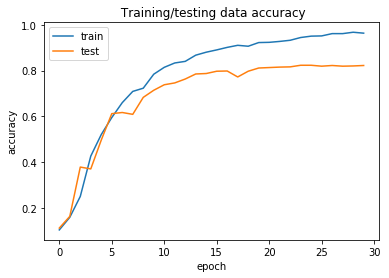

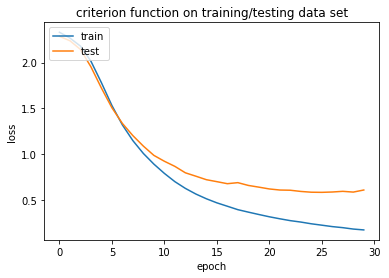

In [10]:
plt.plot(ans.history['acc'])
plt.plot(ans.history['val_acc'])
plt.title(' Training/testing data accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#summarize history for loss
plt.plot(ans.history['loss'])
plt.plot(ans.history['val_loss'])
plt.title('criterion function on training/testing data set')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()